Accuracy (R² Score): -1509568069545255.8


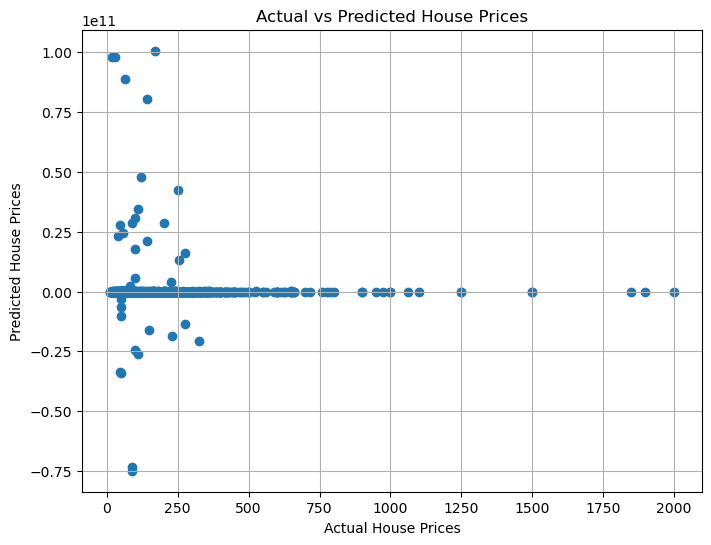

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
data = pd.read_csv("Bengaluru_House_Data.csv")

# Drop unnecessary columns
data = data.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)

# Drop missing values
data = data.dropna()

# Convert size column (e.g., "2 BHK") to numeric
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data = data.drop('size', axis=1)

# Convert total_sqft to numeric
def convert_sqft(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

data['total_sqft'] = data['total_sqft'].apply(convert_sqft)
data = data.dropna()

# Convert categorical column to numeric
data = pd.get_dummies(data, drop_first=True)

# Split features and target
X = data.drop('price', axis=1)
y = data['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy (R² score)
accuracy = r2_score(y_test, y_pred)
print("Accuracy (R² Score):", accuracy)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
